# 1. Loading Libraries and Data

In [1]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train  = pd.read_csv('train_2kmZucJ.csv')
test = pd.read_csv('test_oJQbWVk.csv')

In [3]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
6,7,0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/
7,8,0,New Type C charger cable #UK http://www.ebay.co.uk/itm/-/112598674021 … #bay #Amazon #etsy New Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE 2018 #NewYear #Starting 2018 #recipes #...
8,9,0,Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollow… http://instagr.am/p/Vj6bg5tLql/
9,10,0,Photo: #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor... http://tmblr.co/ZAjC0n1ms_Gp8
13,14,0,"I just made another crazy purchase lol my theory is 'Work hard, Play Hard' Lol #iPad #Apple #Shopping http://instagr.am/p/NUyFHvyE7I/"
15,16,0,From #DeepEllum towards #downtown #Dallas. #BigD #Saturday #RX100M3 #Sony #summer #urban http://instagram.com/p/pzJoOaQqZ4/


In [4]:
train[train['label'] == 1].head(10)

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
5,6,1,iPhone software update fucked up my phone big time Stupid iPhones
10,11,1,hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.
11,12,1,Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade
12,13,1,Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo
14,15,1,@shaqlockholmes @sam_louise1991 the battery is so painful! I charge it overnight and by lunchtime battery is dead! #HateOrange.
18,19,1,The reason I don't have one. #iphone #suck #apple #truth #truthbetold #agree #fact #realitycheck #blackberrypic.twitter.com/zpggd7caZN
19,20,1,How is the apple store gunna be out of 5C screens ?!? It's Monday and ur the FUCKING APPLE STORE !!! #fuckingpissed
22,23,1,I've had this new ipod for four days? And this of button on the back broke... I accidentally hit it once
23,24,1,when your iPhone screen goes completely black and you keep getting texts all day but you can't FUCKING CHECK THEM #Apple #6thiPhone


In [6]:
train.shape, test.shape

((7920, 3), (1953, 2))

In [7]:
train["label"].value_counts()

0    5894
1    2026
Name: label, dtype: int64

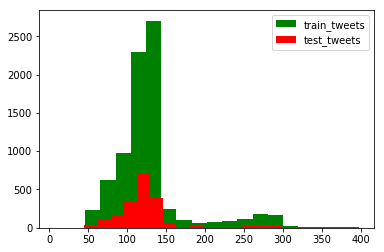

In [10]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets",color='green')
plt.hist(length_test, bins=20, label="test_tweets",color='red')
plt.legend()
plt.show()

# 2. Data Cleaning

In [11]:
combi = train.append(test, ignore_index=True)
combi.shape

C:\Users\Name\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(9873, 3)

In [20]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

# 2.1  Removing Punctuations, Numbers, and Special Characters

In [22]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,Test https goo gl h MfQV
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle http instagram com p YGEt JC JM
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go http fb me N LsUpCu
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I m wired I know I m George I was made that way http instagr am p Li ujS k
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple won t even talk to me about a question I have unless I pay them for their stupid support
5,6,1.0,iPhone software update fucked up my phone big time Stupid iPhones,iPhone software update fucked up my phone big time Stupid iPhones
6,7,0.0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/,Happy for us Z https instagram com p z qGfWlvj
7,8,0.0,New Type C charger cable #UK http://www.ebay.co.uk/itm/-/112598674021 … #bay #Amazon #etsy New Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE 2018 #NewYear #Starting 2018 #recipes #...,New Type C charger cable http www ebay co uk itm New Year Cross Young pic twitter com PjIwq WtC
8,9,0.0,Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollow… http://instagr.am/p/Vj6bg5tLql/,Bout to go shopping again listening to music http instagr am p Vj bg tLql
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor... http://tmblr.co/ZAjC0n1ms_Gp8,Photo http tmblr co ZAjC n ms Gp


# 2.2 Removing Short Words

In [24]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,Test https MfQV
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally transparant silicon case Thanks uncle http instagram YGEt
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this Would http LsUpCu
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know George made that http instagr
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple even talk about question have unless them their stupid support


# 2.3 Text Normalization

In [26]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0                                                                                         [Test, https, MfQV]
1                                 [Finally, transparant, silicon, case, Thanks, uncle, http, instagram, YGEt]
2                                                                           [love, this, Would, http, LsUpCu]
3                                                            [wired, know, George, made, that, http, instagr]
4    [What, amazing, service, Apple, even, talk, about, question, have, unless, them, their, stupid, support]
Name: tidy_tweet, dtype: object

In [27]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [28]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

# 3. Story Generation and Visualization from Tweets

* A) Understanding the common words used in the tweets: WordCloud

* Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

* A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

### Let’s visualize all the words our data using the wordcloud plot.

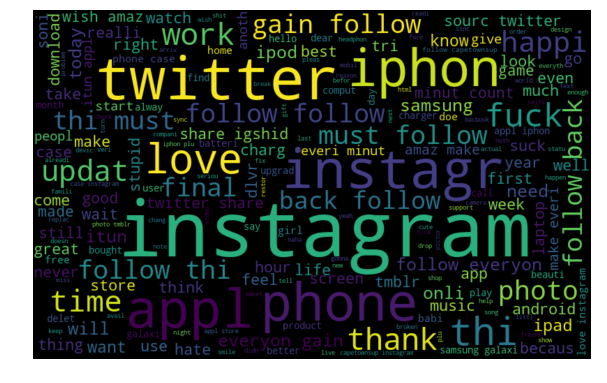

In [29]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

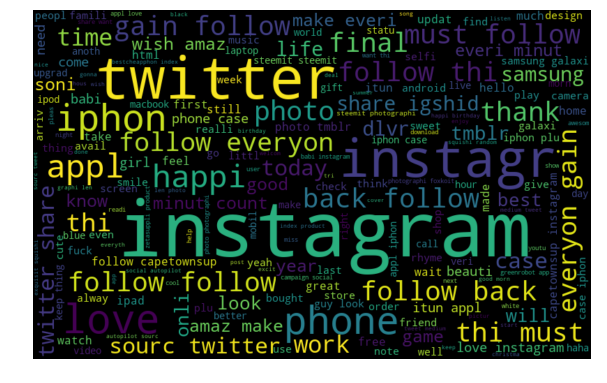

In [30]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

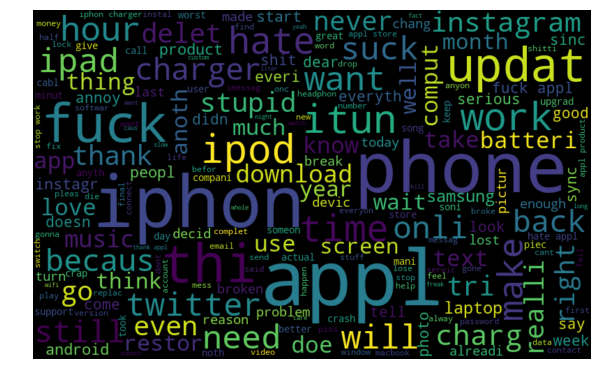

In [31]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [32]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [33]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

In [34]:
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])


In [35]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

# 4. Extracting Features from Cleaned Tweets

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

C:\Users\Name\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### 4.1 Bag-of-Words Features

In [44]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(9873, 1000)

### 4.2 TF-IDF Features

In [45]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(9873, 1000)

# 5. Word Embeddings

### 5.1 Word2Vec Embeddings

In [46]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(1022067, 1558940)

In [47]:
model_w2v.wv.most_similar(positive="dinner")

C:\Users\Name\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mummi', 0.8148688077926636),
 ('nephew', 0.8099551200866699),
 ('meee', 0.8076435327529907),
 ('meeeee', 0.8046410083770752),
 ('treasur', 0.7994176149368286),
 ('lauren', 0.7964202165603638),
 ('peek', 0.7917189598083496),
 ('deliv', 0.7914174795150757),
 ('toward', 0.7900272607803345),
 ('fanat', 0.7896407246589661)]

In [48]:
model_w2v.wv.most_similar(positive="trump")

C:\Users\Name\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('donald', 0.9703320264816284),
 ('lypm', 0.8792479038238525),
 ('clinton', 0.8729442358016968),
 ('lyqf', 0.8693097829818726),
 ('jenner', 0.8678036332130432),
 ('mexican', 0.8588129281997681),
 ('hillari', 0.8527047634124756),
 ('slsandpet', 0.8297450542449951),
 ('kyli', 0.8269741535186768),
 ('hamilton', 0.8252484798431396)]

In [49]:
model_w2v['food']

array([ 0.07640561,  0.05116253,  0.05456547, -0.13609074, -0.29910597,
        0.1878095 , -0.05873137, -0.4084049 , -0.07445562, -0.08891469,
       -0.12255538, -0.03073243,  0.03581195, -0.5101533 , -0.00736149,
        0.00336532, -0.22735237,  0.00156574, -0.05022409, -0.37877077,
        0.13983421,  0.3000307 ,  0.06366626,  0.32515556,  0.6522993 ,
       -0.33917272, -0.4191157 , -0.23127036, -0.19649522, -0.04867706,
        0.22160512,  0.30714178,  0.07803309, -0.32658726,  0.18408325,
        0.507292  ,  0.00699983, -0.30972886, -0.21550108,  0.22544207,
        0.07242409,  0.14264512,  0.0287557 , -0.02772913, -0.0637034 ,
        0.0288724 ,  0.16453947, -0.26620623,  0.06768365,  0.08710203,
       -0.24118584,  0.27533263, -0.08795562,  0.07690899,  0.24342126,
       -0.16245458, -0.02092274,  0.29517806, -0.06019493, -0.04888298,
        0.23593935, -0.5970532 , -0.05278537,  0.43188205,  0.10258407,
        0.21984768,  0.00307411, -0.3675077 ,  0.24991438,  0.17

In [50]:
len(model_w2v['food']) #The length of the vector is 200

200

### 5.2 Preparing Vectors for Tweets

In [51]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [52]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(9873, 200)

### 5.3  Doc2Vec Embedding

In [53]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [55]:
from gensim.models.doc2vec import LabeledSentence
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [56]:
labeled_tweets[:6]

[LabeledSentence(words=['test', 'http', 'mfqv'], tags=['tweet_0']),
 LabeledSentence(words=['final', 'transpar', 'silicon', 'case', 'thank', 'uncl', 'http', 'instagram', 'yget'], tags=['tweet_1']),
 LabeledSentence(words=['love', 'thi', 'would', 'http', 'lsupcu'], tags=['tweet_2']),
 LabeledSentence(words=['wire', 'know', 'georg', 'made', 'that', 'http', 'instagr'], tags=['tweet_3']),
 LabeledSentence(words=['what', 'amaz', 'servic', 'appl', 'even', 'talk', 'about', 'question', 'have', 'unless', 'them', 'their', 'stupid', 'support'], tags=['tweet_4']),
 LabeledSentence(words=['iphon', 'softwar', 'updat', 'fuck', 'phone', 'time', 'stupid', 'iphon'], tags=['tweet_5'])]

In [58]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in (labeled_tweets)])

C:\Users\Name\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [59]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

In [60]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(9873, 200)

# 6 Model Building
 We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

* Logistic Regression
* Support Vector Machine
* RandomForest
* XGBoost

# 1. Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [64]:
train_bow = bow[:7920,:]
test_bow = bow[7920:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [65]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.7788873038516405

In [66]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [67]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [68]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7930795847750866

# 2. Support Vector Machine

In [70]:
from sklearn import svm

In [71]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.752703677000721

In [72]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7516198704103672

In [73]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.793584379358438

# 3. RandomForest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.7594339622641509

In [80]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [83]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.7770007770007771

# 4. XGBoost

In [84]:
from xgboost import XGBClassifier

In [85]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.7553107789142407

In [86]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

# Model Finetuning

In [87]:
import xgboost as xgb

In [88]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [89]:
# Parameters that we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

In [90]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

In [91]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10) 
    for min_child_weight in range(5,8)
]

In [92]:
max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5


C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


	F1 Score 0.7803186 for 16 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.7839586 for 9 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.7847959999999998 for 19 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.7815118 for 18 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.7802132 for 18 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.7845451999999999 for 18 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.7850498 for 38 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.7762268 for 13 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.778774 for 14 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.7797698000000001 for 16 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.7820030000000001 for 32 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.7818522 for 13 rounds
Best params: 8, 5, F1 Score: 0.7850498


In [93]:
params['max_depth'] = 8
params['min_child_weight'] = 6

In [94]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)]
]

In [95]:
max_f1 = 0.
best_params = None
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample

    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5


C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


	F1 Score 0.7723590000000001 for 14 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.7723590000000001 for 14 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.7723590000000001 for 14 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.7723590000000001 for 14 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.7723590000000001 for 14 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.7758206000000001 for 11 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.7758206000000001 for 11 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.7758206000000001 for 11 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.7758206000000001 for 11 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.7758206000000001 for 11 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.7768598 for 12 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.7768598 for 12 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.7768598 for 12 rounds
CV with subsample=0.7, c

In [96]:
params['subsample'] = .9
params['colsample_bytree'] = .5

In [97]:
max_f1 = 0.
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))

    # Update ETA
    params['eta'] = eta

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3


C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


	F1 Score 0.786945 for 18 rounds
CV with eta=0.2
	F1 Score 0.7898464 for 49 rounds
CV with eta=0.1
	F1 Score 0.7844898 for 44 rounds
CV with eta=0.05
	F1 Score 0.788444 for 71 rounds
CV with eta=0.01
	F1 Score 0.39957420000000005 for 0 rounds
CV with eta=0.005
	F1 Score 0.39957420000000005 for 0 rounds
Best params: 0.2, F1 Score: 0.7898464


In [98]:
params['eta'] = .1

In [99]:
max_f1 = 0.
best_params = None
for gamma in range(0,15):
    print("CV with gamma={}".format(gamma/10.))

    # Update ETA
    params['gamma'] = gamma/10.

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = gamma/10.

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with gamma=0.0


C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


	F1 Score 0.7844898 for 44 rounds
CV with gamma=0.1
	F1 Score 0.787236 for 51 rounds
CV with gamma=0.2
	F1 Score 0.7900058 for 66 rounds
CV with gamma=0.3
	F1 Score 0.7847538000000001 for 38 rounds
CV with gamma=0.4
	F1 Score 0.7845222000000001 for 43 rounds
CV with gamma=0.5
	F1 Score 0.7851708000000001 for 37 rounds
CV with gamma=0.6
	F1 Score 0.7921404 for 57 rounds
CV with gamma=0.7
	F1 Score 0.7893256 for 43 rounds
CV with gamma=0.8
	F1 Score 0.7904534 for 54 rounds
CV with gamma=0.9
	F1 Score 0.7849266 for 32 rounds
CV with gamma=1.0
	F1 Score 0.7843554 for 33 rounds
CV with gamma=1.1
	F1 Score 0.7867272 for 40 rounds
CV with gamma=1.2
	F1 Score 0.7845616000000001 for 25 rounds
CV with gamma=1.3
	F1 Score 0.7874066 for 39 rounds
CV with gamma=1.4
	F1 Score 0.7847526 for 41 rounds
Best params: 0.6, F1 Score: 0.7921404


In [100]:
params['gamma'] = 1.2

In [104]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 100,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
)

[0]	Validation-error:0.166246	Validation-f1_score:0.424925
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.146886	Validation-f1_score:0.424925
[2]	Validation-error:0.140993	Validation-f1_score:0.424925
[3]	Validation-error:0.136785	Validation-f1_score:0.424925
[4]	Validation-error:0.140152	Validation-f1_score:0.424925
[5]	Validation-error:0.132155	Validation-f1_score:0.667375
[6]	Validation-error:0.132155	Validation-f1_score:0.717681
[7]	Validation-error:0.131313	Validation-f1_score:0.737349
[8]	Validation-error:0.128788	Validation-f1_score:0.752463
[9]	Validation-error:0.130051	Validation-f1_score:0.767296
[10]	Validation-error:0.127946	Validation-f1_score:0.774359
[11]	Validation-error:0.128788	Validation-f1_score:0.776774
[12]	Validation-error:0.12963	Validation-f1_score:0.773941
[13]	Validation-error:0.127104	Validation-f1_score:0.777996
[14]	Val

# THE END